# Kvanttilaskenta 2024: Kierros 1 tehtävät

Seuraava lohko pitää suorittaa, jotta saat Numpy-kirjaston käyttöön muihin lohkoihin. 

In [1]:
# ctrl+enter
import numpy as np
from qiskit import *
print("Numpy kirjasto on nyt käytössä.")

Numpy kirjasto on nyt käytössä.


## Tehtävä 1.1

Laske vektorin $a= 3i + 4j$ pituus käyttäen indeksöintiä ja Pythagoraan lausetta

In [2]:
a = np.matrix([[3], [4]])
print(a)

[[3]
 [4]]


In [3]:
# Laske vektorin a pituus muuttujaan l
l = (a[0,0]**2+a[1,0]**2)**0.5

print(f"Vektorin 3i + 4j pituus {l}")

Vektorin 3i + 4j pituus 5.0


## Tehtävä 1.2

Laske Pythonilla vektorien a ja b aritmeettinen keskiarvo kaavalla

$$ \frac{\bar a + \bar b}2 $$

In [4]:
a = np.matrix([[1], [3]])
b = np.matrix([[3], [1]])

# laske keskiarvo muuttujaan avg
avg = (a+b)/2

print("Keskiarvoksi saatiin")
print(avg)

Keskiarvoksi saatiin
[[2.]
 [2.]]


## Tehtävä 1.3

Ratkaise Pythonilla ovatko vektorit a ja b kohtisuoria, eli niiden välinen pistetulo 0.

In [5]:
pistetulo = a[0,0]*b[0,0]+a[1,0]*b[1,0]
print(pistetulo)

6


In [8]:
# TApa 2
# transponoidaan vektori a
print(a.T)
# lasketaan vaakavektorin a.T ja pystyvektorin b tulo
pistetulo = a.T*b
print(pistetulo)


[[1 3]]
[[6]]


## Tehtävä 1.4

a) Muunna binääriesitykseen luku $123_{10}$

b) Muunna desimaaliesitykseen luku $1011101_{2}$


Ratkaise tehtävä ohjelmoimalla pythonilla alla olevaan soluun.

In [9]:
bin(123)

'0b1111011'

In [16]:
int("1011101",2)

93

## Tehtävä 1.5

![](./images/xor_circuit.png)

Täytä totuustaulusta puuttuvat kohdat (merkattu alaviivoilla \_) ylläolevan loogisen piirin mukaan. Voit muokata taulua tuplaklikkaamalla.

| $A$ | $B$ | C = $A \lor B$ | D = $\neg(A \land B)$ | Out = $ C \land D$ |
| :-: | :-: | :-:            | :-:                   | :-:       |
|   0 |   0 | 0              | 1                     | 0         |
|   0 |   1 | 1              | 1                     | 1         |
|   1 |   0 | 1              | 1                     | 1         |
|   1 |   1 | 1              | 0                     | 0         |

## Tehtävä 1.6

Lue [johdantoartikkeli Kvanttit horitsontissa sivut 6 -8](https://raw.githubusercontent.com/otaniemenlukio/kvanttilaskenta2024-kierros1/main/kvantit_horisontissa.pdf)

Kerro lyhyesti lukemasi artikkelin perusteella, mitä ovat klassisten ja kvanttitietokoneiden oleelliset erot?

Vastaus: Klassisen tietokoneen bittien arvot voivat olla 0 tai 1. 

Kvanttitietokoneen kubitti voi ennen tilan mittaamista olla arvon 0 ja 1 yhdistelmätilassa. Mittaamisessa kubitin tila valikoituu, ja samalla menetetään informaatiota. Kvanttitietokoneen kubittien välillä on kytkentä, eli lomittuminen (entanglement).

Jos kubitin kvanttitilan tila mitataan, saadaan tilastollisia vastauksia, samalla kvanttitila tuhotaan, ts. se ei enää jatka omaa elämäänsä “kvanttimaailmassa”, vaan tilan kannalta kvanttikoherenssi loppuu. Kvanttikone voidaan kuitenkin alustaa uudelleen suorittamaan samaa identtistä “koodia”. Suorittamalla riittävä määrä mittauksia aivan samalla systeemillä, saadaan selville todennäköisimmät lopputilat, joihin kubitit asettautuvat kvanttiporttien vaikutuksesta. Nämä useimmiten esiintyvät tilat ovat kvanttikoneen tulokset. Jos häiriötekijöitä ei onnistuta poistamaan, on lopputuloksissa niin paljon kohinaa, ettei oikeita tuloksia voi enää helposti tunnistaa laskentadatasta.

## Tehtävä 1.7

Tehtävä on suorittaa seuraava kvanttipiiriesimerkki. Koodiin ei tarvitse tehdä muutoksia.

Huomaa, että kvanttipiirin toimintaa ei vielä tarvitse ymmärtää. Tavoite on tutustua miten kvanttitietokoneiden ohjelmoinnissa käytettävä kvanttipiiri määrittelään Pythonin avulla. Piirin toiminta ja keskeiset käsitteet selitetään myöhemmin kurssilla.

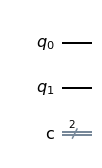

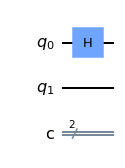

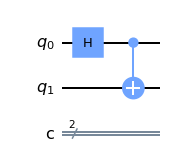

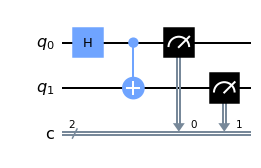

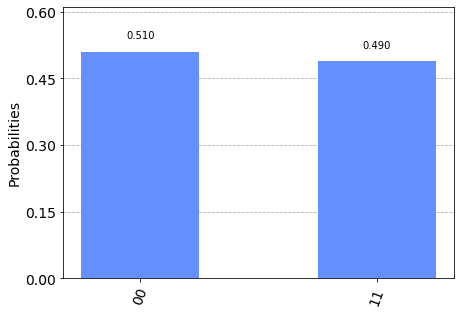

In [17]:
%matplotlib inline
from qiskit import *

# Luodaan 2 kubitin kvanttipiiri, alkutila on |0>.
circuit = QuantumCircuit(2, 2)

display(circuit.draw(output='mpl'))

# Lisätään Hadamard-portti H 
circuit.h(0)
display(circuit.draw(output='mpl'))

# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla
circuit.cx(0, 1)
display(circuit.draw(output='mpl'))

# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
circuit.measure([0, 1], [0, 1])
display(circuit.draw(output='mpl'))

# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))